In [1]:
from wordcloud import WordCloud,STOPWORDS
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Youtube-Dataset.xlsx")
df.head()

,publishedAt,title,tags,duration_in_seconds,viewCount,likeCount,Date of release,# of days,Views per day
0,2016-06-08T15:30:00Z,This Is The Way | Kids Songs | Super Simple Songs,"['This Is The Way', 'Brush Your Teeth', 'Wash ...",139,2230545275,5127752.0,2016-06-08,2676,833537.0983
1,2010-09-05T23:25:33Z,Twinkle Twinkle Little Star,"['Toddler Songs', 'nursery', 'BINGO', 'family'...",154,2076801506,4288074.0,2010-09-05,4779,434568.2164
2,2018-02-22T15:30:01Z,This Is The Way We Get Dressed | Kids Songs | ...,"['kids songs', 'this is the way', 'this is the...",115,1954188587,5733816.0,2018-02-22,2052,952333.6194
3,2016-09-15T14:00:01Z,Five Little Ducks | Kids Songs | Super Simple ...,"['Nursery Rhymes', 'Kids Songs', 'Counting Son...",174,1552746006,3567243.0,2016-09-15,2577,602540.1653
4,2013-11-22T13:30:00Z,If You're Happy | Super Simple Songs,"[""If you're angry"", 'Toddler songs', 'Emotions...",124,958985097,1463941.0,2013-11-22,3605,266015.2835


In [3]:
title = " ".join(df["title"])
tags = " ".join(df["tags"])

Removing punctuation from title and tags

In [5]:
vd_title = [char for char in title if char not in string.punctuation]
vd_title="".join(vd_title) # Join back to a string


vd_tags = [char for char in tags if char not in string.punctuation]
vd_tags="".join(vd_tags)


In [11]:
stop_words = set(STOPWORDS) # create a set of stop words

word_cloud_title = WordCloud(stopwords=stop_words,width=800, height=400)
word_cloud_title.generate(vd_title)


word_cloud_tag = WordCloud(stopwords=stop_words,width=800, height=400)
word_cloud_tag.generate(vd_tags)


# 1. Display word clouds

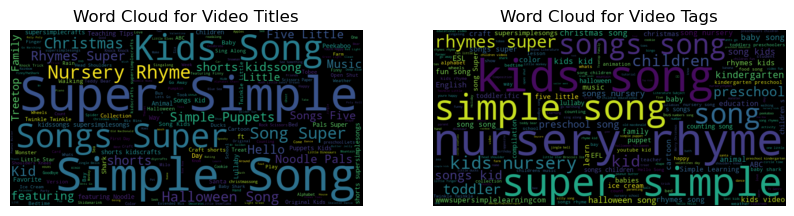

In [12]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(word_cloud_title, interpolation='bilinear')
plt.title('Word Cloud for Video Titles')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(word_cloud_tag, interpolation='bilinear')
plt.title('Word Cloud for Video Tags')
plt.axis('off')

plt.show()

# 2.1 Corelation between the duration in sec and viewcount

(0.0, 8000.0)

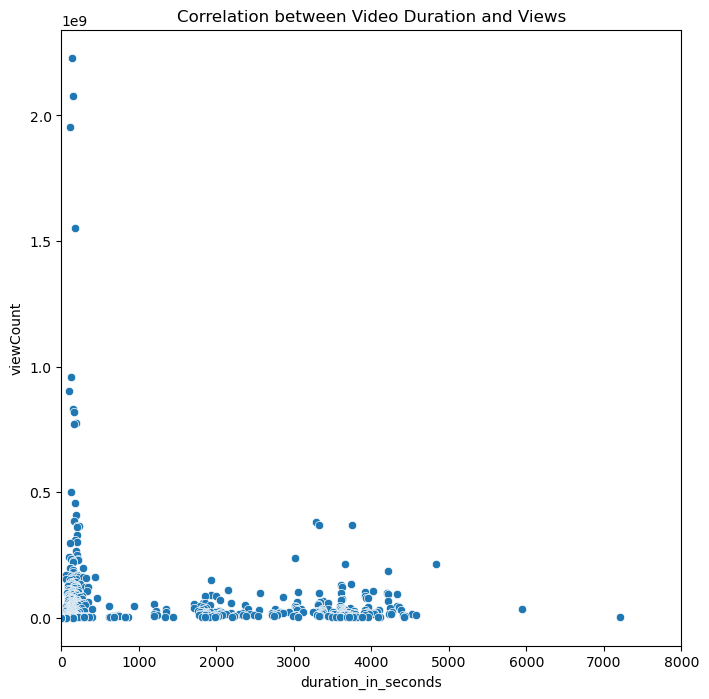

In [32]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df,x=df['duration_in_seconds'],y=df['viewCount'])
plt.title('Correlation between Video Duration and Views')
plt.xlim(0, 8000)  # Adjust the limits 


# 2.2 Corelation between the duration in sec and likecount


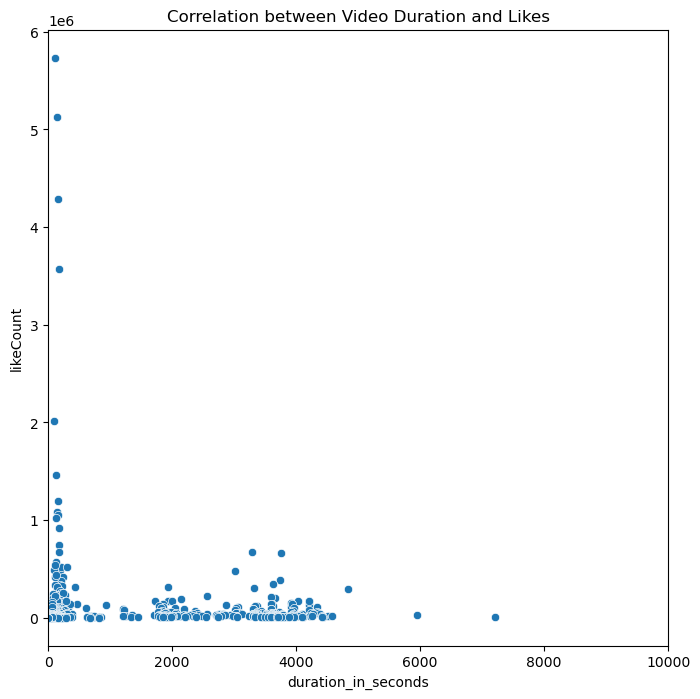

In [55]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df,x=df['duration_in_seconds'],y=df['likeCount'])
plt.xlim(0, 10000)  # Adjust the limits 
plt.title('Correlation between Video Duration and Likes')
plt.show()

<h3>Both views and likes are not perfectly correlated with Vedio duration. From above scatter plots we can see that most of views and likes we got of shorter videos.</h3>

# 3. To explore the correlation between words in video tags and the number of views, I am using TF-IDF (Term Frequency-Inverse Document Frequency). 
<h2>TF-IDF reflects the importance of a word within a document relative to a collection of documents.<h2>



In [49]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def preprocess_tags(tags):
    tags = tags.lower() 
    tokens = word_tokenize(tags) 
    tokens = [word for word in word_tokenize(tags) if word not in string.punctuation]
    filtered_tags = [stemmer.stem(word) for word in tokens if word not in stop_words]  # Remove stopwords and stem
    return " ".join(filtered_tags)  # Join back to a string


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

# calculation of TF-IDF scores of each words
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['tags'].apply(preprocess_tags))

# Convert TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


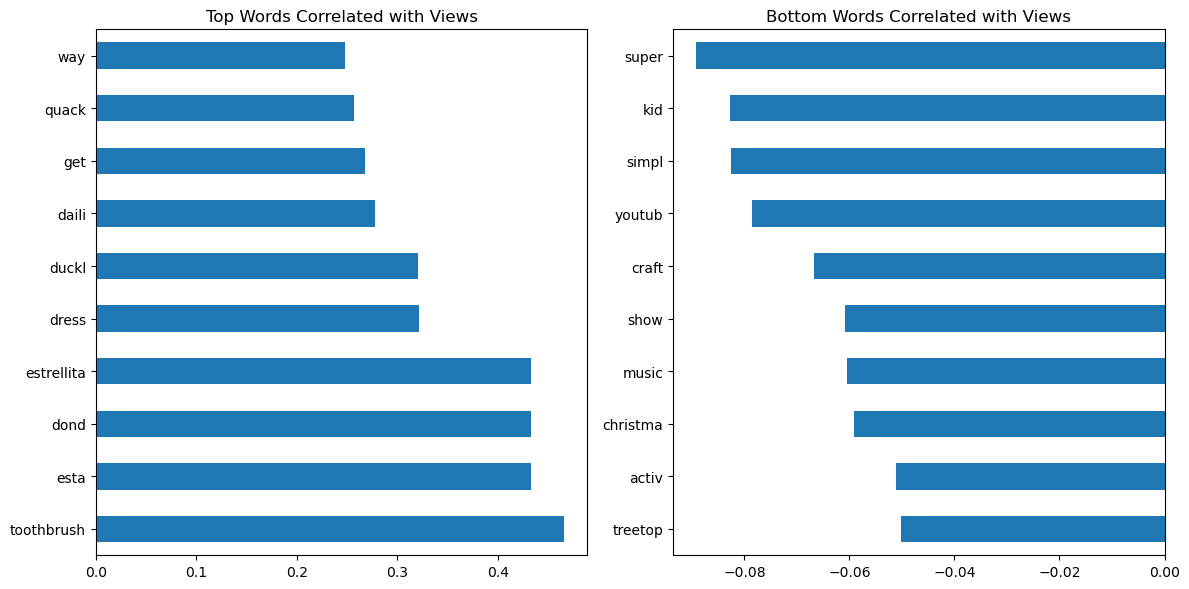

In [51]:
# correlation analysis
correlations = tfidf_df.corrwith(df['viewCount'])
# visualization of correlations
correlations_sorted = correlations.sort_values(ascending=False)
top_words = correlations_sorted.head(10)
bottom_words = correlations_sorted.tail(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
top_words.plot(kind='barh', title='Top Words Correlated with Views')
plt.subplot(1, 2, 2)
bottom_words.plot(kind='barh', title='Bottom Words Correlated with Views')
plt.tight_layout()
plt.show()




<h3>We can see that toothbrush has high correlated value with views and supper is highly negative corelation</h3>

# Identify and Visualize Frequent Words in Most Viewed Videos:

In [52]:
#  top 10 most viewed videos
top_viewed_videos = df.sort_values("viewCount",ascending=False).head(10)

# Analyze video tags of the top 10 most viewed videos
top_n_tags = top_viewed_videos['tags'].apply(preprocess_tags)

# Calculate the frequency of words in the tags of the top 10 videos
from collections import Counter

word_counts = Counter(" ".join(top_n_tags).split())
most_frequent_words = word_counts.most_common(10)  # Get the most frequent words
most_frequent_words

[('song', 74),
 ("'nurseri", 19),
 ("'kid", 15),
 ("'preschool", 14),
 ('kid', 13),
 ("'super", 12),
 ('simpl', 12),
 ('rhyme', 12),
 ("'song", 10),
 ("'toddler", 9)]

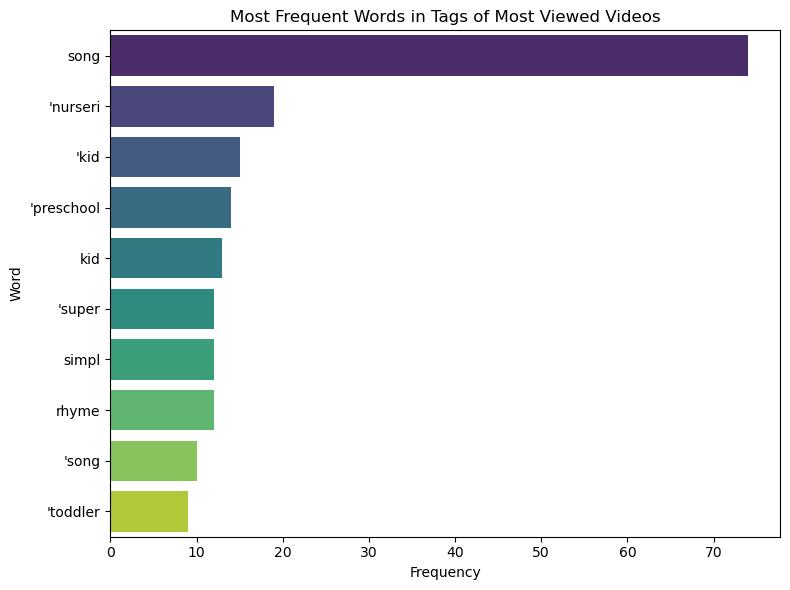

In [53]:
# visualization of most frequent words
most_frequent_words_df = pd.DataFrame(most_frequent_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(8, 6))
sns.barplot(x='Frequency', y='Word', data=most_frequent_words_df, palette='viridis')
plt.title('Most Frequent Words in Tags of Most Viewed Videos')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()


<h3>We can see in most viewed videos the word "song" appeared in the video tags in your dataset a total of 74 times.<h3>

# 4 Identify the most frequently used video tags among the most viewed videos to understand which tags are associated with high view counts.


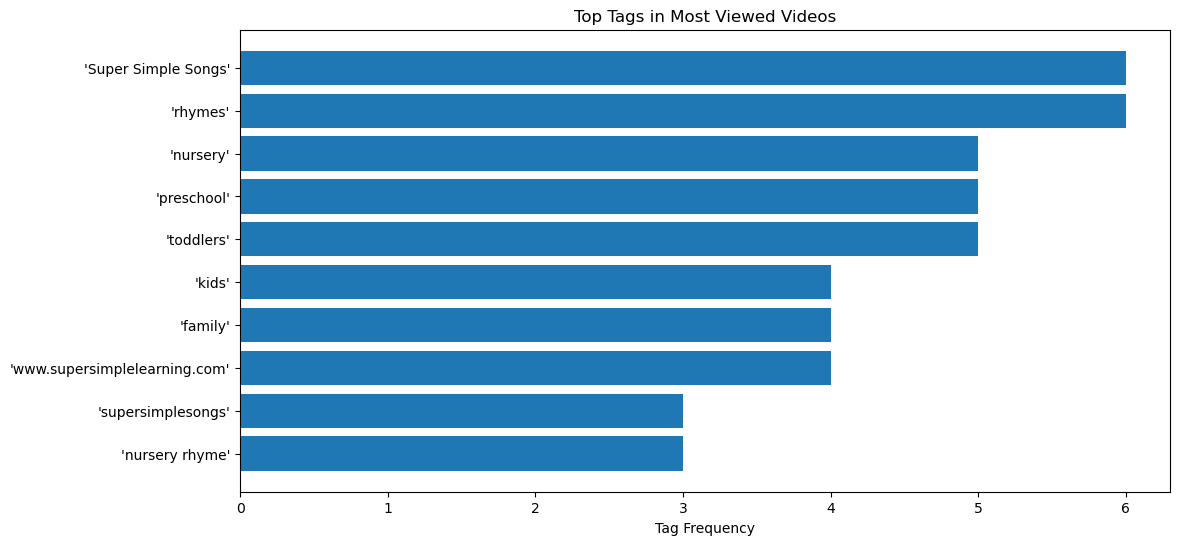

In [31]:
from collections import Counter

# Get the tags from the top viewed videos
top_viewed_videos = df.sort_values("viewCount",ascending=False).head(10)
top_tags = ' '.join(top_viewed_videos['tags'])

# Count the frequency of each tag
tag_counts = Counter(top_tags.split(', '))

# Visualize the top N most frequent tags
N_top_tags = tag_counts.most_common(10)
tags, counts = zip(*N_top_tags)

plt.figure(figsize=(12, 6))
plt.barh(tags, counts)
plt.xlabel('Tag Frequency')
plt.title('Top Tags in Most Viewed Videos')
plt.gca().invert_yaxis()
plt.show()





<h3>From above graphs we can see that top 10 tags that are frequently used in most viewed videos and "Super simple songs" are most frequently used tag.</h3>
